# Model Training

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data/cleaned_data.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,43
4,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,1762.5,28


In [14]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041613 entries, 0 to 1041612
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041613 non-null  object        
 1   CustomerID               1041613 non-null  object        
 2   CustomerDOB              1041613 non-null  object        
 3   CustGender               1041613 non-null  object        
 4   CustLocation             1041613 non-null  object        
 5   CustAccountBalance       1041613 non-null  float64       
 6   TransactionDate          1041613 non-null  datetime64[ns]
 7   TransactionAmount (INR)  1041613 non-null  float64       
 8   CustomerAge              1041613 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 71.5+ MB


In [15]:
df['TransactionDate'].max()

Timestamp('2016-12-09 00:00:00')

In [17]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,43
4,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,1762.5,28


In [18]:
df['TransactionDate1'] = df['TransactionDate']
rfm_df = df.groupby('CustomerID').agg(
    {
        "TransactionDate1": "max",
        "TransactionID": "count",
        "TransactionAmount (INR)": "sum",
    }
)
rfm_df.reset_index()

,CustomerID,TransactionDate1,TransactionID,TransactionAmount (INR)
0,C1010011,2016-09-26,2,5106.0
1,C1010012,2016-08-14,1,1499.0
2,C1010014,2016-07-08,2,1455.0
3,C1010018,2016-09-15,1,30.0
4,C1010024,2016-08-18,1,5000.0
...,...,...,...,...
879352,C9099836,2016-07-08,1,691.0
879353,C9099877,2016-09-15,1,222.0
879354,C9099919,2016-08-18,1,126.0
879355,C9099941,2016-08-28,1,50.0


In [19]:
rfm_df.head()

,TransactionDate1,TransactionID,TransactionAmount (INR)
CustomerID,,,
C1010011,2016-09-26,2,5106.0
C1010012,2016-08-14,1,1499.0
C1010014,2016-07-08,2,1455.0
C1010018,2016-09-15,1,30.0
C1010024,2016-08-18,1,5000.0


In [20]:
rfm_df.shape

(879357, 3)

In [21]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879357 entries, C1010011 to C9099956
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionDate1         879357 non-null  datetime64[ns]
 1   TransactionID            879357 non-null  int64         
 2   TransactionAmount (INR)  879357 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 26.8+ MB


In [22]:
rfm_df['Recency'] = df['TransactionDate'].max() - rfm_df['TransactionDate1']
rfm_df['Recency'] = rfm_df['Recency'].dt.days
rfm_df.drop('TransactionDate1', axis=1, inplace=True)
rfm_df.columns = ['Frequency', 'Monetary', 'Recency']
rfm_df.head()

,Frequency,Monetary,Recency
CustomerID,,,
C1010011,2,5106.0,74
C1010012,1,1499.0,117
C1010014,2,1455.0,154
C1010018,1,30.0,85
C1010024,1,5000.0,113


In [23]:
rfm_df['r_quartile'] = pd.qcut(rfm_df['Recency'], 5, [5, 4, 3, 2, 1])
rfm_df['m_quartile'] = pd.qcut(rfm_df['Monetary'], 5, [1, 2, 3, 4, 5])
rfm_df

,Frequency,Monetary,Recency,r_quartile,m_quartile
CustomerID,,,,,
C1010011,2,5106.0,74,5,5
C1010012,1,1499.0,117,2,4
C1010014,2,1455.0,154,2,4
C1010018,1,30.0,85,4,1
C1010024,1,5000.0,113,3,5
...,...,...,...,...,...
C9099836,1,691.0,154,2,3
C9099877,1,222.0,85,4,2
C9099919,1,126.0,113,3,1


In [24]:
rfm_df['rfm_score'] = rfm_df.r_quartile.astype(str) + rfm_df.Frequency.astype(str) + rfm_df.m_quartile.astype(str)
rfm_df['rfm_score'] = rfm_df['rfm_score'].astype(int)
rfm_df.head()

,Frequency,Monetary,Recency,r_quartile,m_quartile,rfm_score
CustomerID,,,,,,
C1010011,2,5106.0,74,5,5,525
C1010012,1,1499.0,117,2,4,214
C1010014,2,1455.0,154,2,4,224
C1010018,1,30.0,85,4,1,411
C1010024,1,5000.0,113,3,5,315


In [25]:
### Most Valuable Customers
rfm_df.sort_values('rfm_score', ascending=False)[rfm_df['rfm_score'] >= 444]
rfm = rfm_df.loc[:, ['Recency', 'Frequency', 'Monetary']]
cust_id = rfm.index
cust_id
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,74,2,5106.0
C1010012,117,1,1499.0
C1010014,154,2,1455.0
C1010018,85,1,30.0
C1010024,113,1,5000.0


In [26]:
## Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled

array([[-0.68446042,  1.81640666,  0.452262  ],
       [-0.14730261, -0.41099215, -0.04952974],
       [ 0.31490294,  1.81640666, -0.05565084],
       ...,
       [-0.19727078, -0.41099215, -0.24053613],
       [-0.3221912 , -0.41099215, -0.25110895],
       [-0.67196837, -0.41099215, -0.1391205 ]])

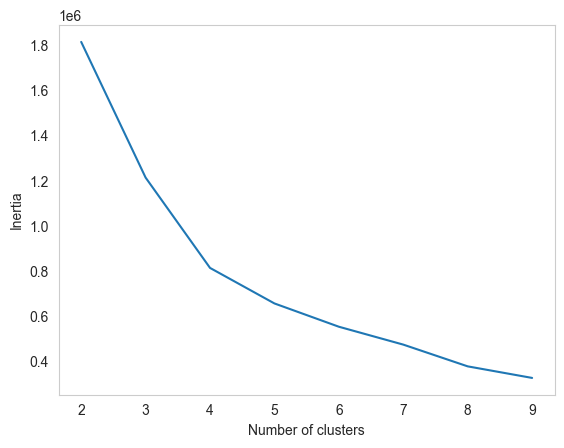

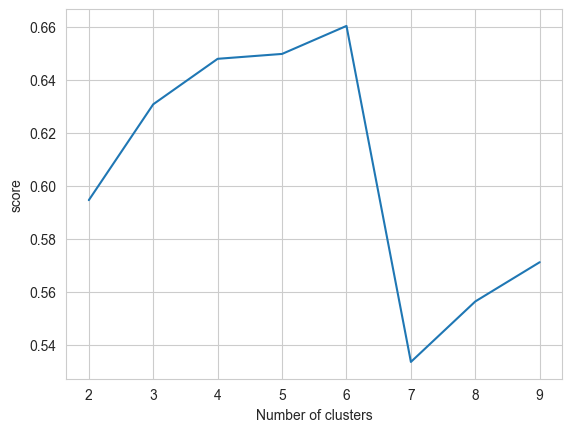

In [27]:
## KMeans Clustering
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

clusters = 10
inertia = []
sil_score = []
km = []

for k in range(2, clusters):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    km.append(kmeans)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    sil = silhouette_score(rfm_scaled, kmeans.labels_, sample_size=50000)
    sil_score.append(sil)

plt.grid()
plt.plot(range(2, clusters), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
plt.plot(range(2, clusters), sil_score)
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=6, init="k-means++")
kmeans.fit(rfm_scaled)
silhouette_score(rfm_scaled, kmeans.labels_, sample_size=50000)

0.6581535054976079

In [29]:
type(rfm_scaled)

numpy.ndarray

In [30]:
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['R', 'F', 'M'])
rfm_scaled['labels'] = kmeans.labels_
rfm_scaled

,R,F,M,labels
0,-0.684460,1.816407,0.452262,1
1,-0.147303,-0.410992,-0.049530,0
2,0.314903,1.816407,-0.055651,1
3,-0.547048,-0.410992,-0.253891,0
4,-0.197271,-0.410992,0.437516,0
...,...,...,...,...
879352,0.314903,-0.410992,-0.161936,0
879353,-0.547048,-0.410992,-0.227181,0
879354,-0.197271,-0.410992,-0.240536,0
879355,-0.322191,-0.410992,-0.251109,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


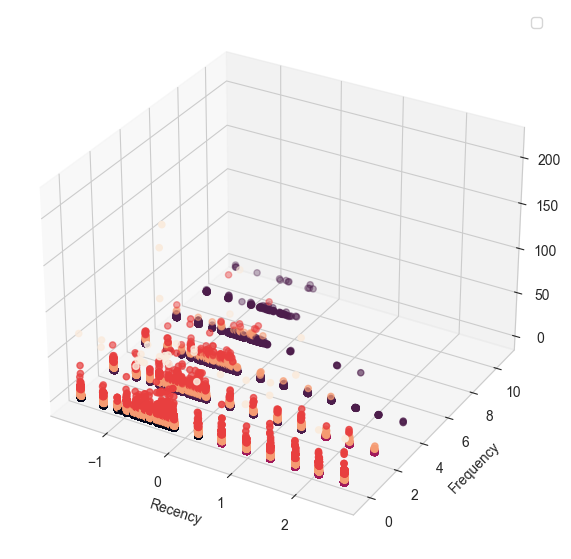

In [34]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(rfm_scaled['R'], rfm_scaled['F'], rfm_scaled['M'], c=rfm_scaled['labels'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

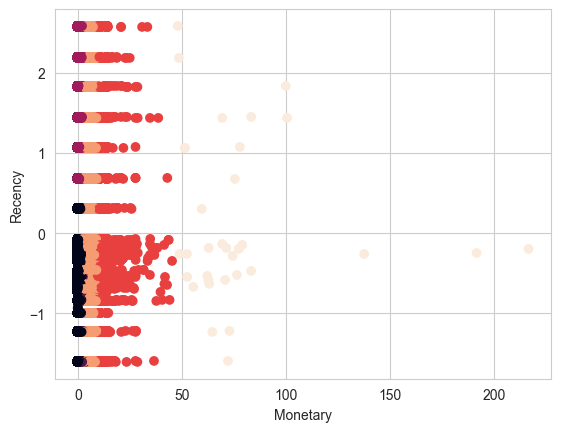

In [35]:
plt.scatter(rfm_scaled['M'], rfm_scaled['R'], c=rfm_scaled['labels'])
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.show()

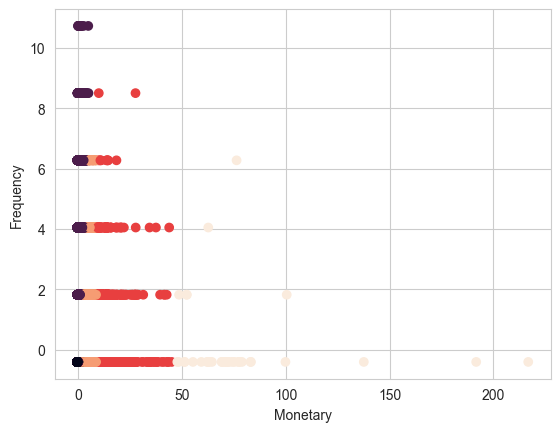

In [36]:
plt.scatter(rfm_scaled['M'], rfm_scaled['F'], c=rfm_scaled['labels'])
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()

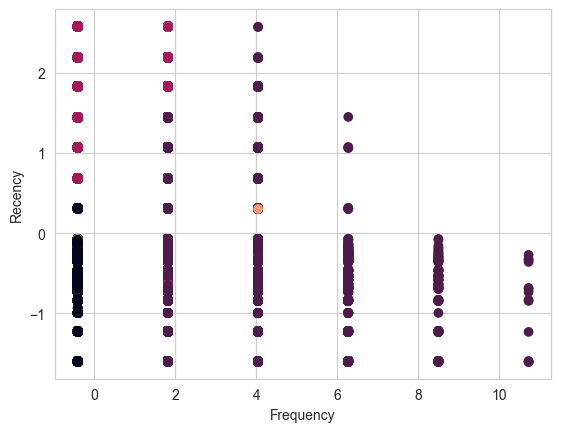

In [37]:
plt.scatter(rfm_scaled['F'], rfm_scaled['R'], c=rfm_scaled['labels'])
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.show()

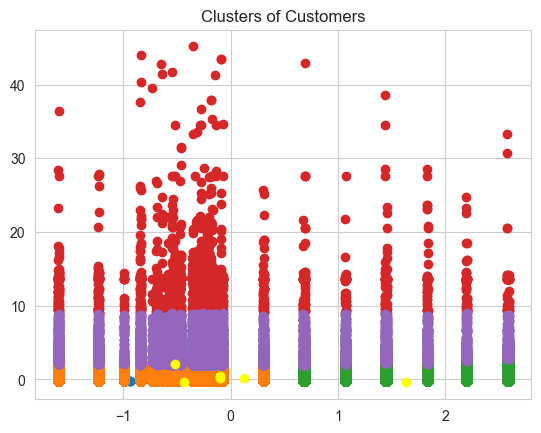

In [38]:
for c in range(5):
    plt.scatter(rfm_scaled[rfm_scaled['labels'] == c]['R'], rfm_scaled[rfm_scaled['labels'] == c]['M'])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', label='Centroids')
plt.title('Clusters of Customers')

plt.show()